Federated Cluster Centers:
[[-0.9215069   1.02371598 -1.30401344 -1.24591883]
 [ 0.21330594 -0.61827015  0.40918211  0.35052554]
 [ 1.28217637  0.30773621  1.20238715  1.31164349]]


c:\Users\Miha\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Miha\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Miha\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Miha\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will ch

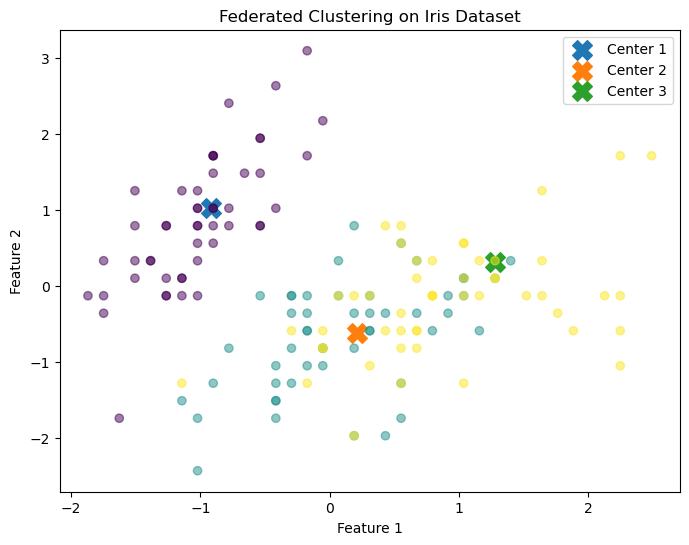

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import the kfed function from your provided code
# Make sure that the provided code is in the same directory or is correctly imported
from fkms.algorithms import kfed  # Replace with the actual module name

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameters
num_clients = 5  # Number of clients
dev_k = 3 # Number of clusters each client estimates
k = 3   # Total number of clusters (same as the number of classes in Iris)

# Split the dataset into chunks for each client
client_data = np.array_split(X_scaled, num_clients)

# Perform federated clustering using the kfed function
local_estimates, centers = kfed(client_data, dev_k, k)

# Print out the cluster centers found by the federated algorithm
print("Federated Cluster Centers:")
print(centers)

# Plot the results
plt.figure(figsize=(8, 6))
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], s=200, marker='X', label=f'Center {i+1}')

# For visualization purposes, let's project the data onto the first two dimensions
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("Federated Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
